<a href="https://colab.research.google.com/github/skkafawi/Eniac-discounts-data-cleaning-/blob/main/the_final_sheet_for_Project_Eniac_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The basics Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import seaborn as sns
import pandas as pd
from datetime import datetime
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#selecting the data from my google drive
brands = "/content/drive/MyDrive/Eniac/brands.csv"
order_lines = "/content/drive/MyDrive/Eniac/orderlines.csv"
orders = "/content/drive/MyDrive/Eniac/orders.csv"
products = "/content/drive/MyDrive/Eniac/products.csv"
brands_df = pd.read_csv(brands)
orderlines_df = pd.read_csv(order_lines)
orders_df = pd.read_csv(orders)
products_df = pd.read_csv(products)

In [ ]:
brands_cl = brands_df.copy()
orderlines_cl = orderlines_df.copy()
orders_cl = orders_df.copy()
products_cl = products_df.copy()

#CLEANING THE TABLES

## Brands table

In [ ]:
# nothing to change

## Orders Table


In [ ]:
#the changes
orders_cl["created_date"] = pd.to_datetime(orders_cl["created_date"])
orders_cl = orders_cl.loc[~orders_cl.total_paid.isna(), :]

## Order_lines Table

In [ ]:
#the changes
orderlines_cl = orderlines_cl.rename(columns={"id_order":"order_id"})
orderlines_cl["date"] = pd.to_datetime(orderlines_cl["date"])
two_dot_percentage = ((orderlines_cl.unit_price.str.contains("\d+\.\d+\.\d+").value_counts()[1] / orderlines_cl.shape[0])*100).round(2)
print(f"The 2 dot problem represents {two_dot_percentage}% of the rows in our DataFrame")
two_dot_order_ids_list = orderlines_cl.loc[orderlines_cl.unit_price.str.contains("\d+\.\d+\.\d+"), "order_id"]
orderlines_cl = orderlines_cl.loc[~orderlines_cl.order_id.isin(two_dot_order_ids_list)]
orderlines_cl["unit_price"] = pd.to_numeric(orderlines_cl["unit_price"])

The 2 dot problem represents 12.3% of the rows in our DataFrame


<ipython-input-13-8f74790894ae>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_cl["unit_price"] = pd.to_numeric(orderlines_cl["unit_price"])


## Products Tables

In [ ]:
#the changes
products_cl = products_cl.drop_duplicates()
products_cl.loc[products_cl["desc"].isna(), "desc"] = products_cl.loc[products_cl["desc"].isna(), "name"]
products_cl = products_cl.loc[~products_cl["price"].isna()]
products_cl = products_cl.loc[(~products_cl.price.astype(str).str.contains("\d+\.\d+\.\d+")) & (~products_cl.price.astype(str).str.contains("\d+\.\d{3,}")), :]
products_cl["price"] = pd.to_numeric(products_cl["price"])

## Products with categories table

In [ ]:
products_cl2 = products_cl.copy()
# sub_categories
products_cl2.loc[products_cl2["type"] == "1216", "category"] = "Computer_Stands"
products_cl2.loc[products_cl2["type"] == "1229", "category"] = "Pens"
products_cl2.loc[products_cl2["type"] == "1230", "category"] = "Cables"
products_cl2.loc[products_cl2["type"] == "1231", "category"] = "Warranty_extensions"
products_cl2.loc[products_cl2["type"] == "1275", "category"] = "Adapter_cards"
products_cl2.loc[products_cl2["type"] == "1280", "category"] = "Rack_mounts"
products_cl2.loc[products_cl2["type"] == "1282", "category"] = "Computers"
products_cl2.loc[products_cl2["type"] == "1296", "category"] = "Monitors"
products_cl2.loc[products_cl2["type"] == "1298", "category"] = "na"
products_cl2.loc[products_cl2["type"] == "1325", "category"] = "Adapters"
products_cl2.loc[products_cl2["type"] == "1334", "category"] = "Routers/Switches"
products_cl2.loc[products_cl2["type"] == "1364", "category"] = "Memory"
products_cl2.loc[products_cl2["type"] == "1375", "category"] = "Microphones"
products_cl2.loc[products_cl2["type"] == "1387", "category"] = "Mouses"
products_cl2.loc[products_cl2["type"] == "1392", "category"] = "Backpacks"
products_cl2.loc[products_cl2["type"] == "1404", "category"] = "na"
products_cl2.loc[products_cl2["type"] == "1405", "category"] = "Tablets"
products_cl2.loc[products_cl2["type"] == "1416", "category"] = "Software"
products_cl2.loc[products_cl2["type"] == "1424", "category"] = "Media_recorders"
products_cl2.loc[products_cl2["type"] == "1433", "category"] = "Drives"
products_cl2.loc[products_cl2["type"] == "1515", "category"] = "Powerbanks"
products_cl2.loc[products_cl2["type"] == "1714", "category"] = "Tablets"
products_cl2.loc[products_cl2["type"] == "1716", "category"] = "Phones"
products_cl2.loc[products_cl2["type"] == "2158", "category"] = "Laptops"
products_cl2.loc[products_cl2["type"] == "2425", "category"] = "Watches_Housings"
products_cl2.loc[products_cl2["type"] == "2434", "category"] = "Watches_Housings"
products_cl2.loc[products_cl2["type"] == "2449", "category"] = "Watches_Straps"
products_cl2.loc[products_cl2["type"] == "4259", "category"] = "Media_players"
products_cl2.loc[products_cl2["type"] == "5185", "category"] = "Watches"
products_cl2.loc[products_cl2["type"] == "5384", "category"] = "Headphones"
products_cl2.loc[products_cl2["type"] == "5395", "category"] = "Powersockets/Cables"
products_cl2.loc[products_cl2["type"] == "5398", "category"] = "Speaker"
products_cl2.loc[products_cl2["type"] == "5399", "category"] = "Wireless_charger"
products_cl2.loc[products_cl2["type"] == "5401", "category"] = "Keyboards"
products_cl2.loc[products_cl2["type"] == "5403", "category"] = "Phone_cases"
products_cl2.loc[products_cl2["type"] == "5404", "category"] = "na"
products_cl2.loc[products_cl2["type"] == "5405", "category"] = "Watches_wristband"
products_cl2.loc[products_cl2["type"] == "5407", "category"] = "Repair_kits"
products_cl2.loc[products_cl2["type"] == "5406", "category"] = "Repair_kits"
products_cl2.loc[products_cl2["type"] == "5720", "category"] = "Phone_stands"
products_cl2.loc[products_cl2["type"] == "8696", "category"] = "Computer_Stands"
products_cl2.loc[products_cl2["type"] == "9094", "category"] = "Cameras"
products_cl2.loc[products_cl2["type"] == "10142", "category"] = "Batteries"
products_cl2.loc[products_cl2["type"] == "10230", "category"] = "Bags"
products_cl2.loc[products_cl2["type"] == "11434", "category"] = "Locks"
products_cl2.loc[products_cl2["type"] == "11859", "category"] = "Sensors"
products_cl2.loc[products_cl2["type"] == "12282", "category"] = "Watch_Stands"
products_cl2.loc[products_cl2["type"] == "11821715", "category"] = "Portable_media_players"
products_cl2.loc[products_cl2["type"] == "11865403", "category"] = "Phone_cases"
products_cl2.loc[products_cl2["type"] == "11905404", "category"] = "na"
products_cl2.loc[products_cl2["type"] == "11935397", "category"] = "Hard_drives"
products_cl2.loc[products_cl2["type"] == "12031714", "category"] = "Tablets"
products_cl2.loc[products_cl2["type"] == "12051714", "category"] = "Tablets"
products_cl2.loc[products_cl2["type"] == "12085400", "category"] = "Locks_Cleaners_Pens"
products_cl2.loc[products_cl2["type"] == "12141714", "category"] = "Tablets"
products_cl2.loc[products_cl2["type"] == "12175397", "category"] = "Server"
products_cl2.loc[products_cl2["type"] == "12215397", "category"] = "Hard_drives"
products_cl2.loc[products_cl2["type"] == "12285400", "category"] = "Cables_Gloves_Cleaner"
products_cl2.loc[products_cl2["type"] == "12355400", "category"] = "na"
products_cl2.loc[products_cl2["type"] == "12575403", "category"] = "Keyboard_cases"
products_cl2.loc[products_cl2["type"] == "12585395", "category"] = "USB_adapters"
products_cl2.loc[products_cl2["type"] == "12635403", "category"] = "Ipad_Cases"
products_cl2.loc[products_cl2["type"] == "12645406", "category"] = "Repair_kits"
products_cl2.loc[products_cl2["type"] == "12655397", "category"] = "Electronic_hard_drives"
products_cl2.loc[products_cl2["type"] == "12755395", "category"] = "Mount_kits"
products_cl2.loc[products_cl2["type"] == "12995397", "category"] = "Docks/Hubs"
products_cl2.loc[products_cl2["type"] == "13005399", "category"] = "Charger"
products_cl2.loc[products_cl2["type"] == "13555403", "category"] = "Phone_screen_protectors"
products_cl2.loc[products_cl2["type"] == "13615399", "category"] = "Charger"
products_cl2.loc[products_cl2["type"] == "13621714", "category"] = "Tablets"
products_cl2.loc[products_cl2["type"] == "13835403", "category"] = "Computer_Cases"
products_cl2.loc[products_cl2["type"] == "13855401", "category"] = "Keyboards"
products_cl2.loc[products_cl2["type"] == "13955495", "category"] = "na"
products_cl2.loc[products_cl2["type"] == "14035403", "category"] = "Ipad_screen_protectors"
products_cl2.loc[products_cl2["type"] == "14305406", "category"] = "Repair_kits"
products_cl2.loc[products_cl2["type"] == "14365395", "category"] = "Adapters"
products_cl2.loc[products_cl2["type"] == "15435405", "category"] = "na"
products_cl2.loc[products_cl2["type"] == "20642062", "category"] = "Software"
products_cl2.loc[products_cl2["type"] == "21485407", "category"] = "Replacments"
products_cl2.loc[products_cl2["type"] == "21535407", "category"] = "Replacments"
products_cl2.loc[products_cl2["type"] == "21561716", "category"] = "Phones"
products_cl2.loc[products_cl2["type"] == "21571716", "category"] = "Phones"
products_cl2.loc[products_cl2["type"] == "21632158", "category"] = "Computers"
products_cl2.loc[products_cl2["type"] == "24215399", "category"] = "Charging_stands"
products_cl2.loc[products_cl2["type"] == "24811716", "category"] = "Phones"
products_cl2.loc[products_cl2["type"] == "24821716", "category"] = "Phones"
products_cl2.loc[products_cl2["type"] == "24861714", "category"] = "Tablets"
products_cl2.loc[products_cl2["type"] == "24885185", "category"] = "Watches"
products_cl2.loc[products_cl2["type"] == "24895185", "category"] = "Watches"
products_cl2.loc[products_cl2["type"] == "42931714", "category"] = "Tablets"
products_cl2.loc[products_cl2["type"] == "42945397", "category"] = "USB_drives"
products_cl2.loc[products_cl2["type"] == "51601716", "category"] = "Phones"
products_cl2.loc[products_cl2["type"] == "51861714", "category"] = "Tablets"
products_cl2.loc[products_cl2["type"] == "51871714", "category"] = "Tablets"
products_cl2.loc[products_cl2["type"] == "51882158", "category"] = "Computers"
products_cl2.loc[products_cl2["type"] == "51902158", "category"] = "Computers"
products_cl2.loc[products_cl2["type"] == "51912158", "category"] = "Computers"
products_cl2.loc[products_cl2["type"] == "54085407", "category"] = "na"
products_cl2.loc[products_cl2["type"] == "54864259", "category"] = "Remotes"
products_cl2.loc[products_cl2["type"] == "57445397", "category"] = "USB_drives"
products_cl2.loc[products_cl2["type"] == "79201715", "category"] = "Portable_media_players"
products_cl2.loc[products_cl2["type"] == "85641716", "category"] = "Phones"
products_cl2.loc[products_cl2["type"] == "85651716", "category"] = "Phones"
products_cl2.loc[products_cl2["type"] == "101781405", "category"] = "Replacments"
products_cl2.loc[products_cl2["type"] == "106431714", "category"] = "Tablets"
products_cl2.loc[products_cl2["type"] == "113271716", "category"] = "Phones"
products_cl2.loc[products_cl2["type"] == "113281716", "category"] = "Phones"
products_cl2.loc[products_cl2["type"] == "113291716", "category"] = "Phones"
products_cl2.loc[products_cl2["type"] == "113464259", "category"] = "TVs"
products_cl2.loc[products_cl2["type"] == "113851714", "category"] = "Tablets"
products_cl2.loc[products_cl2["type"] == "118692158", "category"] = "Computers"
products_cl2.loc[products_cl2["type"] == "1,44E+11", "category"] = "Replacments"
products_cl2.loc[products_cl2["type"] == "2,16E+11", "category"] = "Computers"
products_cl2.loc[products_cl2["type"] == "2,17E+11", "category"] = "Laptops"
products_cl2.loc[products_cl2["type"] == "5,39E+11", "category"] = "Laptops"
products_cl2.loc[products_cl2["type"] == "5,44E+11", "category"] = "Computers"
products_cl2.loc[products_cl2["type"] == "5,49E+11", "category"] = "Phone_batteries"
products_cl2.loc[products_cl2["type"] == "9,29E+11", "category"] = "Laptops"
products_cl2.loc[products_cl2["type"] == "1,02E+12", "category"] = "Laptops"
products_cl2.loc[products_cl2["type"] == "5,43E+15", "category"] = "Computers"
products_cl2.loc[products_cl2["type"] == "5,43E+15", "category"] = "Computers"
products_cl2.loc[products_cl2["type"] == "5,45E+15", "category"] = "Computers"
products_cl2.loc[products_cl2["type"] == "5,72E+15", "category"] = "Computers"
products_cl2.loc[products_cl2["type"] == "5,74E+15", "category"] = "Computers"

In [ ]:
# product_categories
products_cl2.loc[products_cl2["category"].isin(["Computer_stands", "Pens", "Cables", "Warranty_extensions",
                                                 "Adapter_cards", "Rack_mounts", "Monitors", "Adapters",
                                                 "Memory", "Microphones", "Mouses", "Software", "Media_recorders",
                                                 "Drives", "Keyboards", "Repair_kits", "Batteries", "Locks", "Hard_drives",
                                                 "Locks_Cleaners_Pens", "Cables_Gloves_Cleaner", "Keyboard_cases", "USB_adapters",
                                                 "Repair_kits","Computer_Cases", "Keyboards", "USB_drives", "Computer_Stands"]), "product_categories"] = "computers_accessories"
products_cl2.loc[products_cl2["category"].isin(["Routers/Switches", "Media_players", "Powersockets/Cables", "Cameras",\
                                              "Sensors", "Portable_media_players", "Server", "Electronic_hard_drives",\
                                              "Mount_kits", "Docks/Hubs", "Charger", "Wireless_charger", "Replacments",\
                                              "TVs", "Remotes"]), "product_categories"] = "electronics"
products_cl2.loc[products_cl2["category"].isin(["Computers", "Laptops"]), "product_categories"] = "computers"
products_cl2.loc[products_cl2["category"].isin(["Backpacks", "Powerbanks", "Bags"]), "product_categories"] = "accessories"
products_cl2.loc[products_cl2["category"].isin(["Tablets", "Phones", "Phone_stands", "Phone_cases", "Ipad_Cases", "Phone_screen_protectors",\
                                              "Ipad_screen_protectors", "Phone_batteries", "Charging_stands"]), "product_categories"] = "Telephony_and_tablets"
products_cl2.loc[products_cl2["category"].isin(["Watches_Housings", "Watches", "Watches_wristband", "Watch_Stands"]), "product_categories"] = "watches_gifts"
products_cl2.loc[products_cl2["category"].isin(["Headphones", "Speaker"]), "product_categories"] = "audio"
products_cl2.loc[products_cl2["category"].isin(["na"]), "product_categories"] = "others"
products_cl2= products_cl2.dropna()
products_cl2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9808 entries, 0 to 19325
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sku                 9808 non-null   object 
 1   name                9808 non-null   object 
 2   desc                9808 non-null   object 
 3   price               9808 non-null   float64
 4   promo_price         9808 non-null   object 
 5   in_stock            9808 non-null   int64  
 6   type                9808 non-null   object 
 7   category            9808 non-null   object 
 8   product_categories  9808 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 766.2+ KB


# Data Quality


## 1.  Define Pandas display format

In [ ]:
pd.set_option("display.float_format", lambda x: "%.2f" % x)

## 2. Exclude unwanted orders

In [ ]:
# Include only actual purchases
mask = orders_cl['state'].isin(['Cancelled', 'Pending', 'Shopping Basket', 'Place Order'])
orders_cl.drop(orders_cl[mask].index[:], inplace=True)

# Let's create a copy of the orders_cl DataFrame, to make sure any of our changes won't affect the original DataFrame.
actual_purchases_df = orders_cl.copy()
actual_purchases_df = actual_purchases_df.loc[actual_purchases_df['state'].isin(["Completed"]), :]
actual_purchases_list = list(actual_purchases_df["order_id"])
orderlines_cl.loc[~ orderlines_cl.order_id.isin(actual_purchases_list)]


# Now we can filter our cleaned DataFrames to include only the order_id's in the list we just made. We'll also change the DataFrames from _cl to _qu, so we can distinguish between the data that has been cleaned, and that which has been quality controlled.
orders_qu = orders_cl.loc[orders_cl["order_id"].isin(actual_purchases_df["order_id"]), :].copy()
orderlines_qu = orderlines_cl.loc[orderlines_cl["order_id"].isin(actual_purchases_list), :].copy()


# Keep only the orders that are present in both orders and orderlines
# Approximately 3000 difference!!! Let's fix that. We'll perform an inner merge on the two tables using the order_id & id_order. This will then keep only the order_id's that are present in both tables, which will then help us filter our _qu DataFrames once again.
orders_lines_merged_df = orders_qu.merge(orderlines_qu, how="inner", left_on="order_id", right_on="order_id")
o_ids_in_both_list = list(orders_lines_merged_df["order_id"].unique())
orders_qu = orders_qu.loc[orders_qu["order_id"].isin(o_ids_in_both_list), :]
orderlines_qu = orderlines_qu.loc[orderlines_cl["order_id"].isin(o_ids_in_both_list), :]
len(orders_qu["order_id"].unique()), len(orderlines_qu["order_id"].unique())

(43064, 43064)

##3.  Exclude orders with unknown products

---



In [ ]:
known_skus_list = list(products_cl2["sku"].unique())

# We can't simply delete the rows containing unknown products. We need to remove the entirety of any order that contains an unknown product.
# The 1st step is to identify any order that contains an unknown product. Then find the order_id of these orders. Finally filter these order numbers out of our _qu DataFrames.
orders_with_unknown_products_list = list(orderlines_qu.loc[~orderlines_qu.sku.isin(known_skus_list), "order_id"])
# Now we can filter our DataFrame to exclude the order_id's that contain unknown products
orders_qu = orders_qu.loc[~orders_qu["order_id"].isin(orders_with_unknown_products_list), :]
orderlines_qu = orderlines_qu.loc[~orderlines_qu["order_id"].isin(orders_with_unknown_products_list), :]
# Let's have a quick check to make sure we're filtering both DataFrames the same. They should both contain the same number of unique order_id's.
len(orders_qu["order_id"].unique()), len(orderlines_qu["order_id"].unique())

(41299, 41299)

## 4.Explore the revenue from different tables

In [ ]:
orderlines_qu_copy = orderlines_qu.copy()
orders_qu_copy = orders_qu.copy()
orderlines_qu_copy["unit_price_total"] = orderlines_qu_copy["product_quantity"] * orderlines_qu_copy["unit_price"]
orderlines_qu_group_order_df = orderlines_qu_copy.groupby("order_id", as_index=False)["unit_price_total"].sum()
diff_df = orders_qu_copy.merge(orderlines_qu_group_order_df,
                               how = 'inner',
                               left_on="order_id",
                               right_on="order_id"
                               )
diff_df["difference"] = diff_df["total_paid"] - diff_df["unit_price_total"]
diff_df

,order_id,created_date,total_paid,state,unit_price_total,difference
0,241423,2017-11-06 13:10:02,136.15,Completed,129.16,6.99
1,242832,2017-12-31 17:40:03,15.76,Completed,10.77,4.99
2,243330,2017-02-16 10:59:38,84.98,Completed,77.99,6.99
3,245275,2017-06-28 11:35:37,149.00,Completed,149.00,0.00
4,245595,2017-01-21 12:52:47,112.97,Completed,105.98,6.99
...,...,...,...,...,...,...
41294,527042,2018-03-14 11:47:50,18.98,Completed,13.99,4.99
41295,527070,2018-03-14 11:50:48,24.97,Completed,19.98,4.99
41296,527074,2018-03-14 11:51:42,24.97,Completed,19.98,4.99
41297,527096,2018-03-14 11:58:40,34.96,Completed,29.97,4.99


In [ ]:
# the average difference between total_paid and unit_price_total
diff_df.difference.mean().round(2)

4.47

count   41299.00
mean        4.47
std        26.17
min      -165.00
25%         0.00
50%         4.99
75%         6.99
max      3984.99
Name: difference, dtype: float64

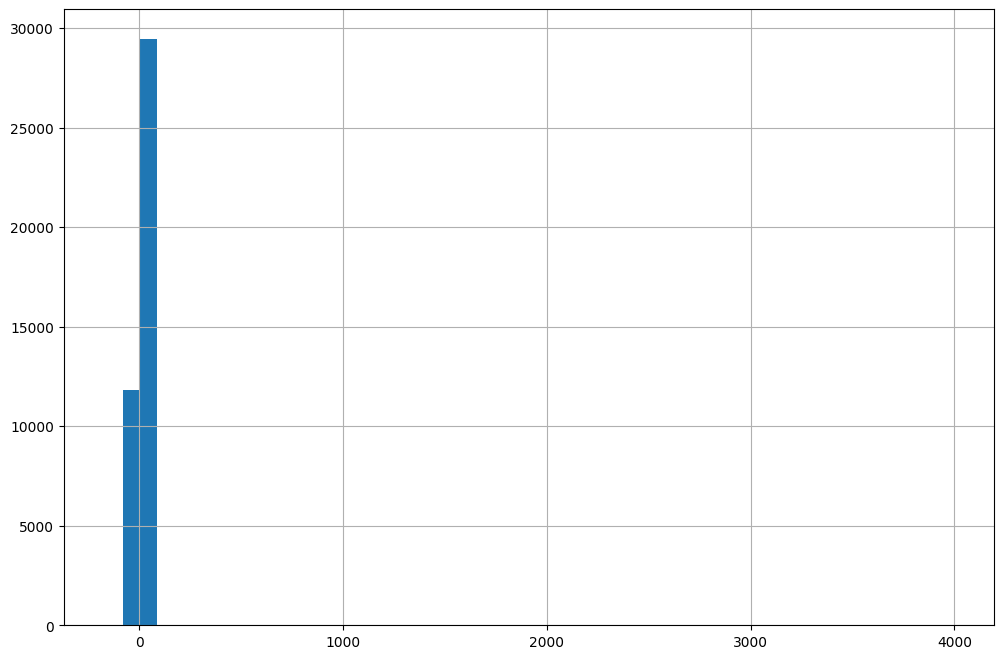

In [ ]:
diff_df.difference.hist(bins= 50, figsize=(12,8));
diff_df.difference.describe()

## 5.excluding the outlayers

In [ ]:
# calculate the quartiles
Q1 = diff_df["difference"].quantile(0.25)
Q3 = diff_df["difference"].quantile(0.75)

# calculate the interquartile range
IQR = Q3-Q1

# filter the DataFrame to include only "non-outliers"
diff_no_outliers_df = diff_df.loc[(diff_df["difference"] >= (Q1 - 1.5*IQR)) & (diff_df["difference"] <= (Q3 + 1.5*IQR))]
diff_no_outliers_df

,order_id,created_date,total_paid,state,unit_price_total,difference
0,241423,2017-11-06 13:10:02,136.15,Completed,129.16,6.99
1,242832,2017-12-31 17:40:03,15.76,Completed,10.77,4.99
2,243330,2017-02-16 10:59:38,84.98,Completed,77.99,6.99
3,245275,2017-06-28 11:35:37,149.00,Completed,149.00,0.00
4,245595,2017-01-21 12:52:47,112.97,Completed,105.98,6.99
...,...,...,...,...,...,...
41294,527042,2018-03-14 11:47:50,18.98,Completed,13.99,4.99
41295,527070,2018-03-14 11:50:48,24.97,Completed,19.98,4.99
41296,527074,2018-03-14 11:51:42,24.97,Completed,19.98,4.99
41297,527096,2018-03-14 11:58:40,34.96,Completed,29.97,4.99


In [ ]:
# Now we need to remove these orders with extreme differences from our orders_lines_merged DataFrame.
normal_diff_list = list(diff_no_outliers_df["order_id"].unique())
orders_qu = orders_qu.loc[orders_qu["order_id"].isin(normal_diff_list), :]
orderlines_qu = orderlines_qu.loc[orderlines_cl["order_id"].isin(normal_diff_list), :]
len(orders_qu["order_id"].unique()), len(orderlines_qu["order_id"].unique())

(40594, 40594)

In [ ]:
diff_df

,order_id,created_date,total_paid,state,unit_price_total,difference
0,241423,2017-11-06 13:10:02,136.15,Completed,129.16,6.99
1,242832,2017-12-31 17:40:03,15.76,Completed,10.77,4.99
2,243330,2017-02-16 10:59:38,84.98,Completed,77.99,6.99
3,245275,2017-06-28 11:35:37,149.00,Completed,149.00,0.00
4,245595,2017-01-21 12:52:47,112.97,Completed,105.98,6.99
...,...,...,...,...,...,...
41294,527042,2018-03-14 11:47:50,18.98,Completed,13.99,4.99
41295,527070,2018-03-14 11:50:48,24.97,Completed,19.98,4.99
41296,527074,2018-03-14 11:51:42,24.97,Completed,19.98,4.99
41297,527096,2018-03-14 11:58:40,34.96,Completed,29.97,4.99


# analysis

## Answering the first questions from the LMS


### 1-How should products be classified into different categories to simplify reports and analysis?


computers_accessories    2717
Telephony_and_tablets    2133
electronics              1789
others                   1317
computers                1130
audio                     337
watches_gifts             206
accessories               179
Name: product_categories, dtype: int64

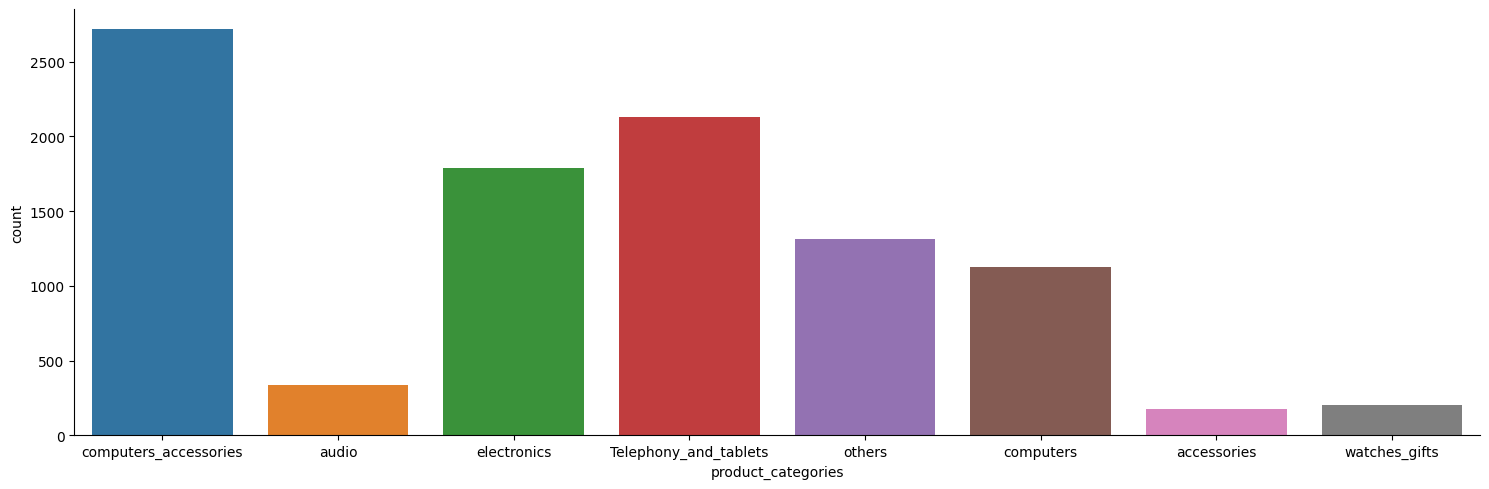

In [ ]:
products_cl2.product_categories.unique()
sns.catplot(products_cl2,
            x="product_categories",
            kind="count",
            aspect = 3);
products_cl2.product_categories.value_counts()

### 2-What is the distribution of product prices across different categories?




In [ ]:
products_cl2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9808 entries, 0 to 19325
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sku                 9808 non-null   object 
 1   name                9808 non-null   object 
 2   desc                9808 non-null   object 
 3   price               9808 non-null   float64
 4   promo_price         9808 non-null   object 
 5   in_stock            9808 non-null   int64  
 6   type                9808 non-null   object 
 7   category            9808 non-null   object 
 8   product_categories  9808 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 766.2+ KB


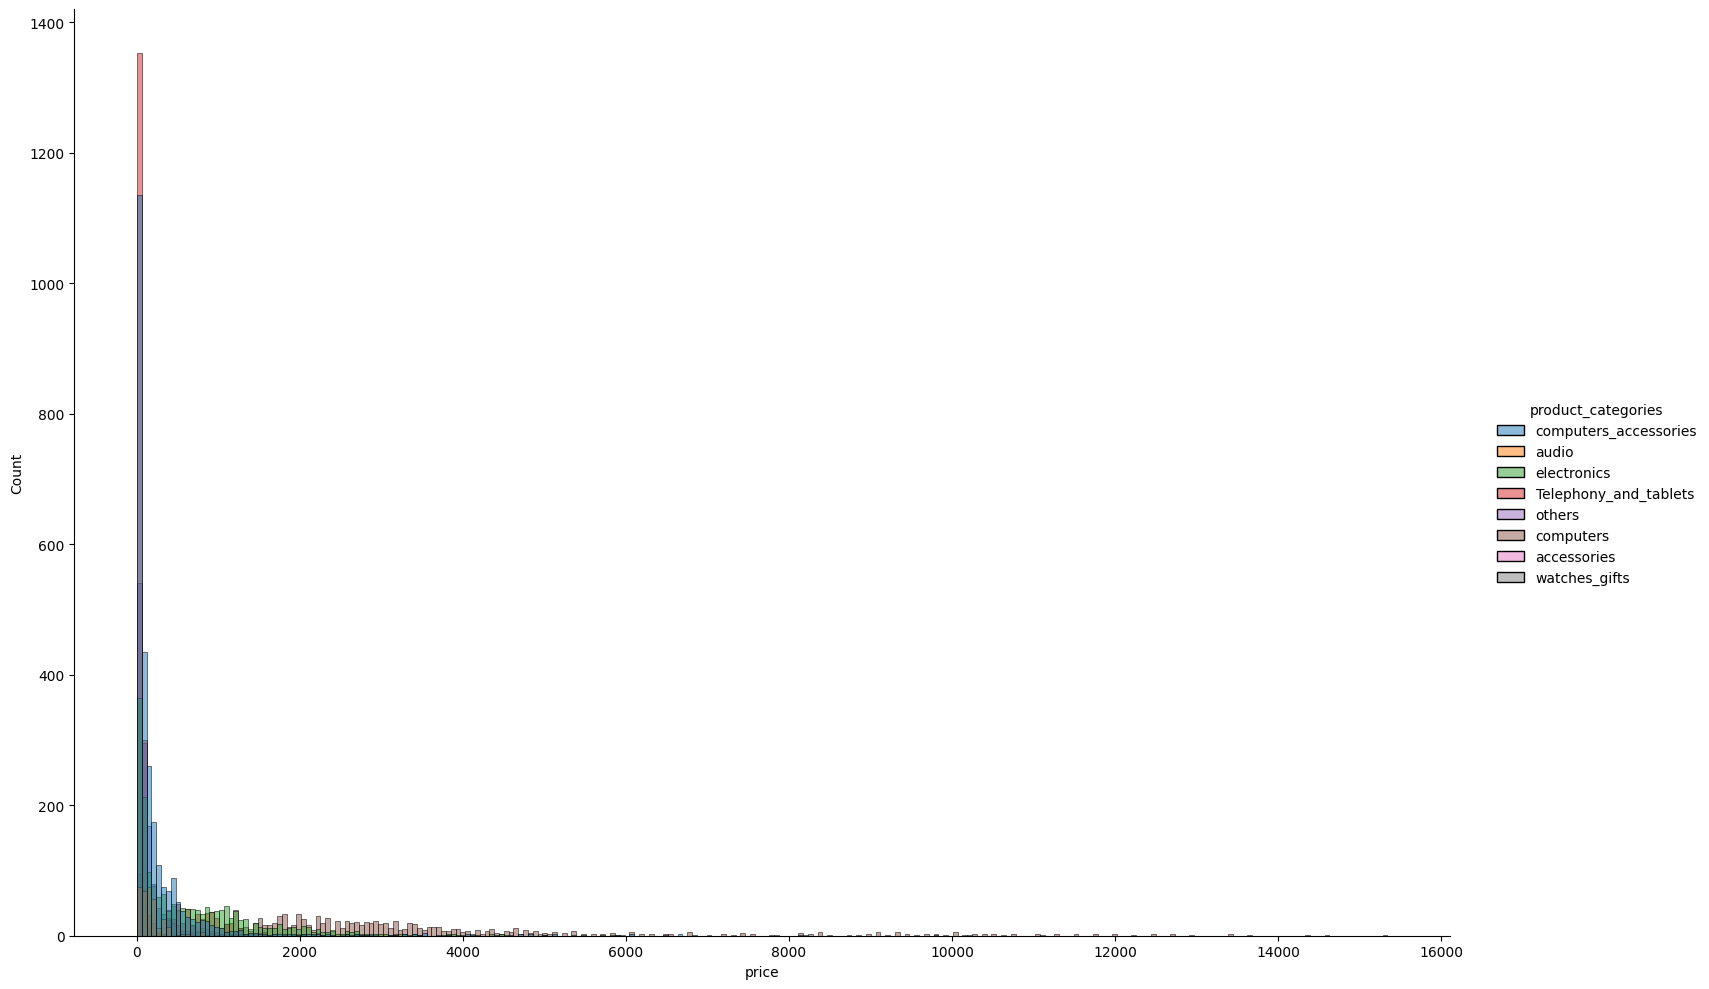

In [ ]:
sns.displot(products_cl2,
            x="price",
            hue="product_categories",
            aspect=1.5,
            height=10)

### 3-How many products are being discounted?

In [ ]:
ol_p = orderlines_qu.merge(products_cl2,
                    how="left",
                    left_on="sku",
                    right_on="sku")
ol_p["discount_amount"] = ol_p["price"] - ol_p["unit_price"]
ol_p.sort_values(by="discount_amount", ascending=False)
products_with_dicounts = ol_p.loc[ol_p["discount_amount"] > 0].sort_values(by="discount_amount", ascending=False)
products_without_dicounts = ol_p.loc[ol_p["discount_amount"] <= 0].sort_values(by="discount_amount", ascending=False)
products_with_dicounts
# products_without_dicounts

,id,order_id,product_id,product_quantity,sku,unit_price,date,name,desc,price,promo_price,in_stock,type,category,product_categories,discount_amount
17724,1303519,382526,0,1,PAC2067,479.00,2017-07-26 19:41:00,"Second hand - Apple iMac 24 ""Core 2 Duo 28 GHz...",Computer Refurbished iMac 24 inch Core 2 Duo 2...,1799.00,4.855.949,0,1282,Computers,computers,1320.00
13320,1265635,364414,0,1,PAC2071,489.00,2017-06-11 12:34:44,"Second hand - Apple iMac 24 ""Core 2 Duo 28 GHz...",Computer Refurbished iMac 24 inch Core 2 Duo 2...,1799.00,4.889.998,0,1282,Computers,computers,1310.00
11988,1251378,357485,0,1,PAC2065,499.00,2017-05-20 07:18:41,"Second hand - Apple iMac 24 ""Core 2 Duo 28 GHz...",Computer Refurbished iMac 24 inch Core 2 Duo 2...,1799.00,499,0,1282,Computers,computers,1300.00
28623,1407335,426708,0,1,PAC2281,255.59,2017-11-14 12:47:25,"Second hand - Apple iMac 20 ""Core 2 Duo 226GHz...",Refurbished iMac 20 inch Core 2 Duo | 2GB RAM ...,1499.00,2.555.945,0,"5,43E+15",Computers,computers,1243.41
25880,1385192,416025,0,1,PAC2062,335.59,2017-10-23 00:51:52,"Second hand - Apple iMac 20 ""Core 2 Duo 266GHz...",IMac used 20 inch Core 2 Duo 266GHz | 4GB RAM ...,1499.00,3.355.948,0,51882158,Computers,computers,1163.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2719,1144577,308802,0,1,BNQ0034,363.99,2017-01-13 13:59:46,"GW2765HT Monitor Benq 27 """,LED 27-inch monitor flicker-free technology an...,364.00,3.639.898,0,1296,Monitors,computers_accessories,0.01
2151,1140642,307125,0,1,BNQ0034,363.99,2017-01-11 10:44:41,"GW2765HT Monitor Benq 27 """,LED 27-inch monitor flicker-free technology an...,364.00,3.639.898,0,1296,Monitors,computers_accessories,0.01
15220,1284906,373806,0,1,SXA0007,209.99,2017-07-06 18:18:02,SecurityXtra One Security Support iPad Pro Adj...,Adjustable safety bracket anchored to the wall...,210.00,2.099.895,0,1216,Computer_Stands,computers_accessories,0.01
12060,1252345,357956,0,1,LAC0179,718.99,2017-05-22 13:07:28,12TB LaCie 2big Thunderbolt 2,Dual RAID disk box 12TB Thunderbolt 2 for Mac ...,719.00,6.539.941,0,11935397,Hard_drives,computers_accessories,0.01


### 4-How big are the offered discounts as a percentage of the product prices?

In [ ]:
products_with_dicounts["discount_percentage"] = (products_with_dicounts["discount_amount"]/products_with_dicounts["price"]) * 100
products_with_dicounts

,id,order_id,product_id,product_quantity,sku,unit_price,date,name,desc,price,promo_price,in_stock,type,category,product_categories,discount_amount,discount_percentage
17724,1303519,382526,0,1,PAC2067,479.00,2017-07-26 19:41:00,"Second hand - Apple iMac 24 ""Core 2 Duo 28 GHz...",Computer Refurbished iMac 24 inch Core 2 Duo 2...,1799.00,4.855.949,0,1282,Computers,computers,1320.00,73.37
13320,1265635,364414,0,1,PAC2071,489.00,2017-06-11 12:34:44,"Second hand - Apple iMac 24 ""Core 2 Duo 28 GHz...",Computer Refurbished iMac 24 inch Core 2 Duo 2...,1799.00,4.889.998,0,1282,Computers,computers,1310.00,72.82
11988,1251378,357485,0,1,PAC2065,499.00,2017-05-20 07:18:41,"Second hand - Apple iMac 24 ""Core 2 Duo 28 GHz...",Computer Refurbished iMac 24 inch Core 2 Duo 2...,1799.00,499,0,1282,Computers,computers,1300.00,72.26
28623,1407335,426708,0,1,PAC2281,255.59,2017-11-14 12:47:25,"Second hand - Apple iMac 20 ""Core 2 Duo 226GHz...",Refurbished iMac 20 inch Core 2 Duo | 2GB RAM ...,1499.00,2.555.945,0,"5,43E+15",Computers,computers,1243.41,82.95
25880,1385192,416025,0,1,PAC2062,335.59,2017-10-23 00:51:52,"Second hand - Apple iMac 20 ""Core 2 Duo 266GHz...",IMac used 20 inch Core 2 Duo 266GHz | 4GB RAM ...,1499.00,3.355.948,0,51882158,Computers,computers,1163.41,77.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2719,1144577,308802,0,1,BNQ0034,363.99,2017-01-13 13:59:46,"GW2765HT Monitor Benq 27 """,LED 27-inch monitor flicker-free technology an...,364.00,3.639.898,0,1296,Monitors,computers_accessories,0.01,0.00
2151,1140642,307125,0,1,BNQ0034,363.99,2017-01-11 10:44:41,"GW2765HT Monitor Benq 27 """,LED 27-inch monitor flicker-free technology an...,364.00,3.639.898,0,1296,Monitors,computers_accessories,0.01,0.00
15220,1284906,373806,0,1,SXA0007,209.99,2017-07-06 18:18:02,SecurityXtra One Security Support iPad Pro Adj...,Adjustable safety bracket anchored to the wall...,210.00,2.099.895,0,1216,Computer_Stands,computers_accessories,0.01,0.00
12060,1252345,357956,0,1,LAC0179,718.99,2017-05-22 13:07:28,12TB LaCie 2big Thunderbolt 2,Dual RAID disk box 12TB Thunderbolt 2 for Mac ...,719.00,6.539.941,0,11935397,Hard_drives,computers_accessories,0.01,0.00


### 5-How do seasonality and special dates (Christmas, Black Friday) affect sales?

,order_id
date,
2017-01-31,5996
2017-02-28,2552
2017-03-31,218
2017-04-30,1849
2017-05-31,2125
2017-06-30,1696
2017-07-31,4056
2017-08-31,2668
2017-09-30,2464


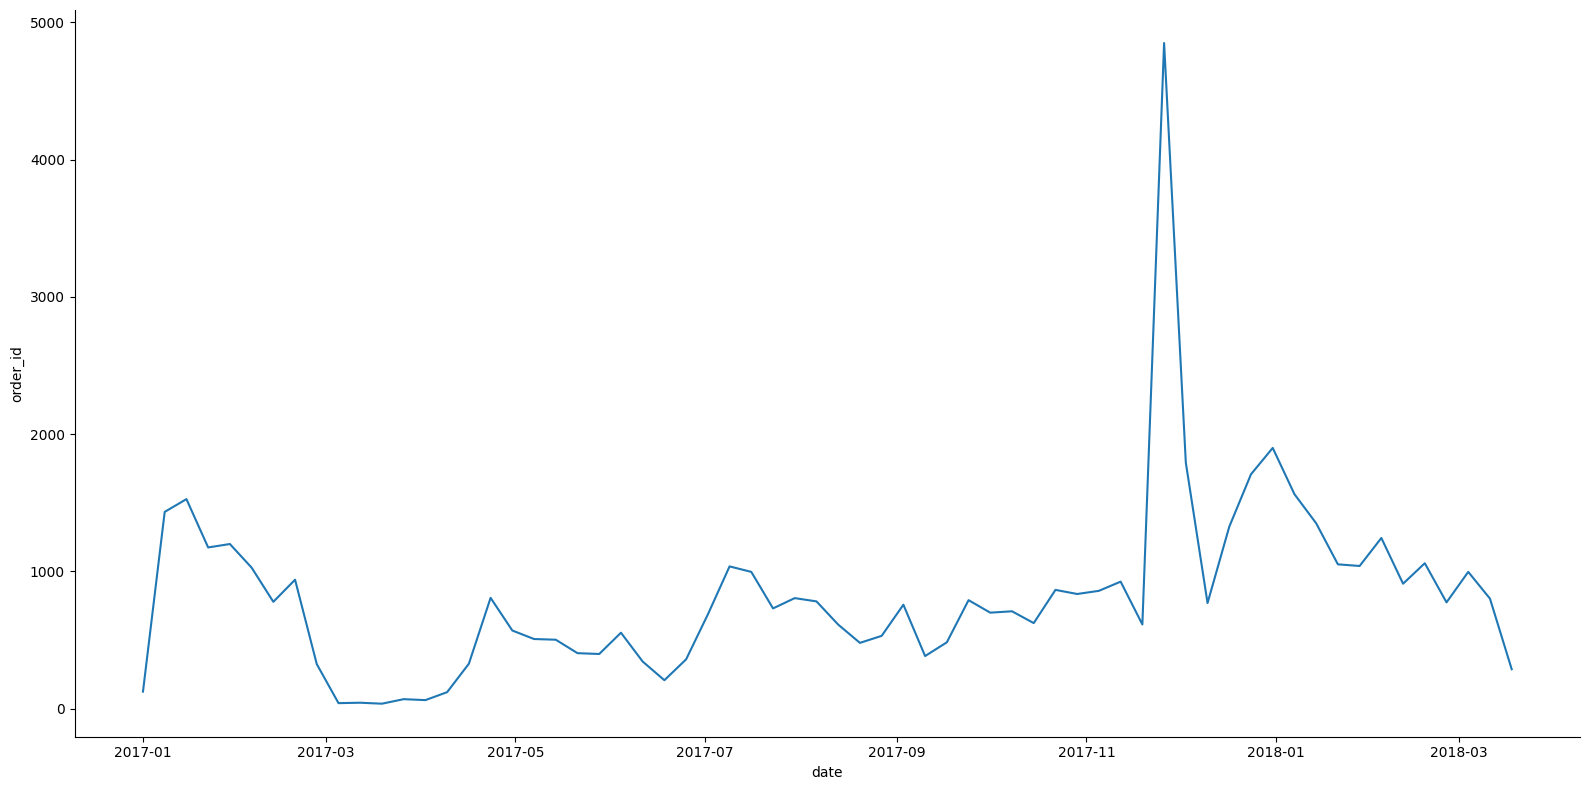

In [ ]:
ol_p.resample("M", on="date")["order_id"].count().to_frame()
sns.relplot(data = ol_p.resample("W", on="date")["order_id"].count().to_frame(),
            kind="line",
           x="date",
           y="order_id",
               height=8,
             aspect=2
            )
ol_p.resample("M", on="date")["order_id"].count().to_frame()

### 6-How could data collection be improved?

In [ ]:
# more careful to put in the data from all this things (duplicate, missing values, corupted data inside the columns, mixed data types)
# is it manualy entered or code releted


## Answering more question from the LMS

### 1-What is the time period that the dataset covers?

In [ ]:
orderlines_qu.sort_values(by="date", ascending=False).head(1)
orderlines_qu.sort_values(by="date", ascending=False).tail(1)
# 2017-01-01 ======= 2018-03-14

,id,order_id,product_id,product_quantity,sku,unit_price,date
7,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16


### 2-What is the overall revenue for that time?

In [ ]:
orders_qu.total_paid.sum()

7920477.509999999

### 3-Are there seasonal patterns in the evolution of sales?

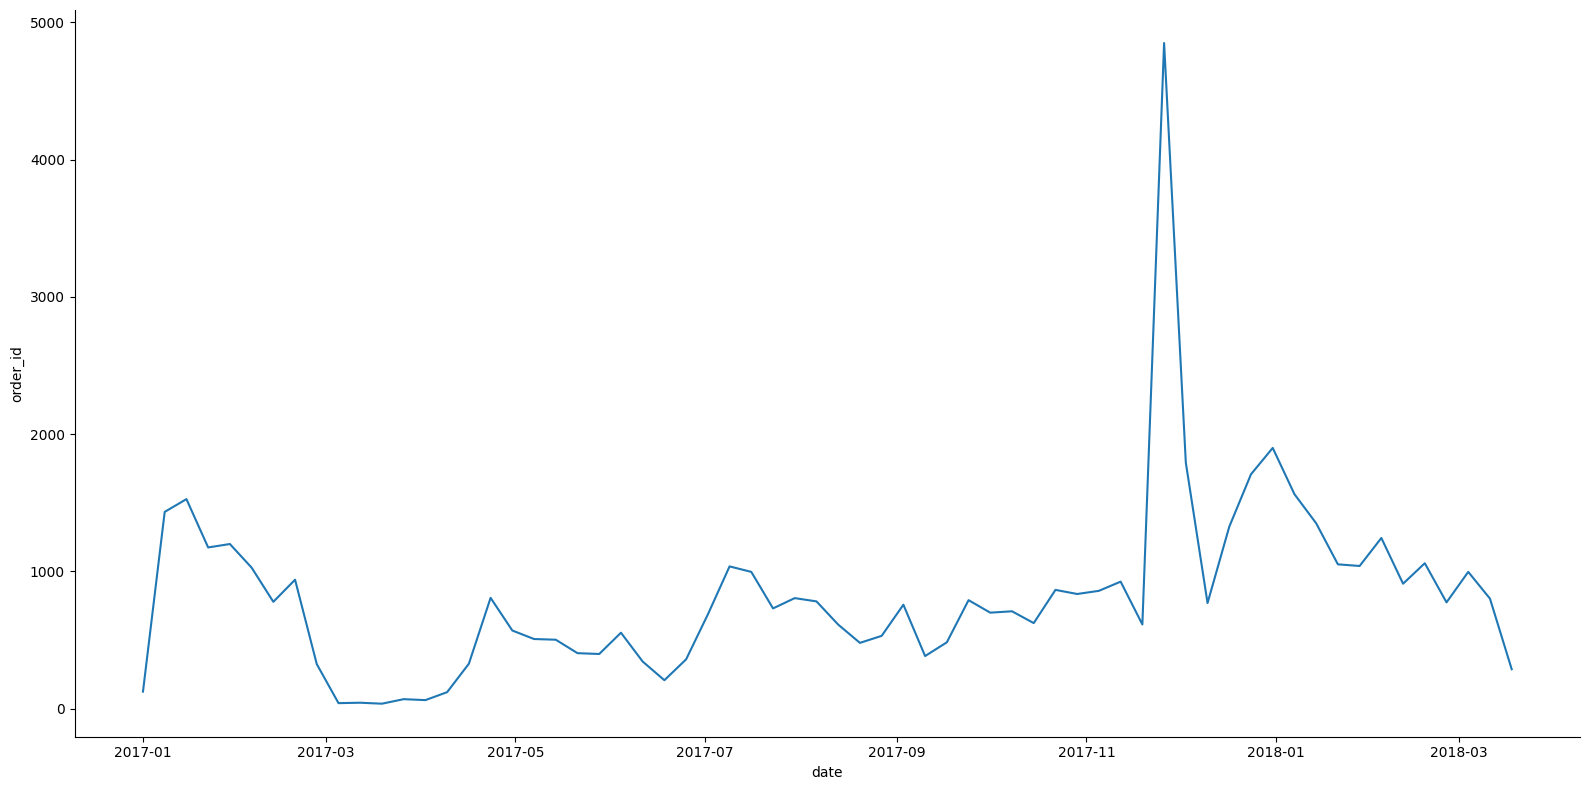

In [ ]:
sns.relplot(data = ol_p.resample("W", on="date")["order_id"].count().to_frame(),
            kind="line",
           x="date",
           y="order_id",
               height=8,
             aspect=2
            )
# ya ofcourse there is, black friday , cristmas, january and july

### 4-What are the most sold products?

In [ ]:
# the most sold is computers_accessories in term of product_categories
ol_p.groupby("product_categories").agg({"product_quantity":"sum"}).sort_values(by="product_quantity", ascending=False)

,product_quantity
product_categories,
computers_accessories,28169
Telephony_and_tablets,11320
electronics,9459
others,4494
audio,3408
accessories,1176
watches_gifts,934
computers,316


In [ ]:
ol_p.sample(50)

,id,order_id,product_id,product_quantity,sku,unit_price,date,name,desc,price,promo_price,in_stock,type,category,product_categories,discount_amount
11027,1242613,353206,0,1,DLL0035,289.99,2017-05-06 11:33:51,"Dell U2415 Monitor 24 ""FHD",FHD 24-inch monitor with multiple ports for Ma...,371.99,2.839.894,1,1296,Monitors,computers_accessories,82.00
33618,1452397,445719,0,1,APP1970,351.85,2017-11-26 17:34:41,Apple iPhone 32GB Space Gray,New iPhone SE with 4-inch screen 32 free GB.,419.00,3.589.997,0,51601716,Phones,Telephony_and_tablets,67.15
43876,1555132,488209,0,1,SPE0189,36.99,2018-01-11 16:11:49,"Speck Case SmartShell MacBook Pro 13 ""(Late 20...",opaque housing for MacBook Pro 13-inch with / ...,49.99,369.897,0,13835403,Computer_Cases,computers_accessories,13.00
17573,1302157,381903,0,1,APP1972,359.00,2017-07-25 17:55:32,Apple iPhone 32GB Rose Gold,New iPhone SE with 4-inch screen 32 free GB.,419.00,3.589.997,1,51601716,Phones,Telephony_and_tablets,60.00
27191,1395022,420694,0,1,BEZ0212,24.99,2017-11-01 13:30:58,"Be.ez LA robe Case Graphite MacBook Pro 15 ""(L...",flexible sheath with full protection for MacBo...,29.99,199.892,0,13835403,Computer_Cases,computers_accessories,5.00
9710,1231904,348052,0,1,ELA0018,19.99,2017-04-21 08:06:46,Elago W3 Support Stand Vintage Apple Watch White,Charging stand with Macintosh Vintage design f...,24.95,15.99,1,24215399,Charging_stands,Telephony_and_tablets,4.96
43943,1555760,489000,0,1,SAT0034,26.99,2018-01-11 23:49:52,Support Satechi Slim MacBook or iMac Aluminum ...,Stand with aluminum finish and practical desig...,49.99,44.99,1,8696,Computer_Stands,computers_accessories,23.00
22538,1357237,402371,0,1,TUC0095,39.99,2017-09-20 18:33:12,Tucano Work Out 2 shoulder MacBook Pro / Air 1...,Lightweight ergonomic shoulder strap with mult...,49.99,399.905,0,10230,Bags,accessories,10.00
27445,1396993,421684,0,1,OWC0025,199.58,2017-11-03 22:54:20,SSD expansion kit OWC Aura Pro 6G 240GB MacBoo...,SSD 240GB expansion for MacBook Air 11-inch an...,241.99,1.995.835,1,12215397,Hard_drives,computers_accessories,42.41
24182,1371295,409200,0,1,MAC0122,14.99,2017-10-06 08:55:17,"Macally USB 3.0 External Enclosure 2.5 ""SATA P...",Aluminum HDD external case 2.5 USB 3.0 for Mac...,29.95,149.895,0,12995397,Docks/Hubs,electronics,14.96


In [ ]:
# the most sold is APP1190 in term of SKU
ol_p.groupby(["sku", "name"]).agg({"product_quantity":"sum"}).sort_values(by="product_quantity", ascending=False)
ol_p.groupby(["category"]).agg({"product_quantity":"sum"}).sort_values(by="product_quantity", ascending=False)

,product_quantity
category,
Hard_drives,6603
Phone_cases,4678
na,4494
Memory,3799
Electronic_hard_drives,2801
Headphones,2528
Phones,2321
USB_adapters,2019
Tablets,1975


### 5-What are the products that generate the most revenue?

In [ ]:
# LGE0044 is the most product that generate revenue
ol_p["total_paid_with_price"] = ol_p["price"] * ol_p["product_quantity"]
ol_p["total_paid_with_unit_price"] = ol_p["unit_price"] * ol_p["product_quantity"]
ol_p.groupby(["sku", "name"]).agg({"total_paid_with_unit_price":"sum"}).sort_values(by="total_paid_with_unit_price", ascending=False)

,,total_paid_with_unit_price
sku,name,
LGE0044,"LG 27UD88-W Monitor 27 ""UHD 4K USB 3.0 USB-C",135375.83
APP2446,Apple iPhone 6 32GB Space Gray,104560.64
APP1922,AirPods Apple Bluetooth Headset for iPhone iPad iPod and Apple Watch,85653.26
APP2477,Apple iPhone 64GB Space Gray 8,85301.93
APP1970,Apple iPhone 32GB Space Gray,80715.76
...,...,...
BOO0066,Booq Boa Skin XS iPad Case Purple / Gray,4.29
KIN0125,Kingston 8GB Micro SDHC Class 10 45MB / s,3.99
PUR0107,Puro Just Cavalli Swan iPhone Case Passion / 5s / 5 black,3.99


In [ ]:
# computers_accessories is the most category that generate revenue
ol_p.groupby(["product_categories"]).agg({"total_paid_with_unit_price":"sum"}).sort_values(by="total_paid_with_unit_price", ascending=False)
ol_p.groupby(["category"]).agg({"total_paid_with_unit_price":"sum"}).sort_values(by="total_paid_with_unit_price", ascending=False)

,total_paid_with_unit_price
category,
Phones,1324178.92
Hard_drives,1182560.87
Monitors,656397.73
Tablets,628902.59
Server,460434.85
na,399320.62
Memory,385066.89
Electronic_hard_drives,383843.40
Headphones,256219.70


## extra analysis

In [ ]:
# avg blackfriday sales = 20-25 november 2017
products_with_dicounts_in_blackfriday = products_with_dicounts.loc[(products_with_dicounts["date"].between("2017-11-20", "2017-11-27")) & (products_with_dicounts["product_categories"]== "computers_accessories")]
products_with_dicounts_in_blackfriday.discount_percentage.median()

23.8553289726818

In [ ]:
# cristmas sales = 24-30 december 2017
products_with_dicounts_in_cristmas = products_with_dicounts.loc[(products_with_dicounts["date"].between("2017-12-24", "2017-12-30")) & (products_with_dicounts["product_categories"]== "computers_accessories")]
products_with_dicounts_in_cristmas.discount_percentage.median()

19.059512531220392

In [ ]:
# avg sales outside blackfriday and cristmas
products_with_discounts_not_in_BF_or_CS = products_with_dicounts.loc[~(((products_with_dicounts["date"].between("2017-11-20", "2017-11-27"))\
                                                                        &\
                                                                        products_with_dicounts["date"].between("2017-12-24", "2017-12-30"))\
                                                                        & \
                                                                         ((products_with_dicounts["product_categories"]== "computers_accessories")))]
products_with_discounts_not_in_BF_or_CS.discount_percentage.median()

19.49761578067899

# Trying to answer the big question (WHETHER OR NOT ITS BENEFICIAL TO DISCOUNT PRODUCTS)

In [ ]:
#discount status
ol_p["discount_status"] = ol_p["discount_amount"].apply(lambda x: "yes" if x > 0 else "no")
# finding the discount_precentage
ol_p["discount_percentage"] = (ol_p["discount_amount"] / ol_p["price"])*100
ol_p.sort_values(by="discount_percentage", ascending=False).tail(50)
# i considered that the discounts that are more than 50% are aggresive discounts
ol_p["discount_type"] = ol_p["discount_percentage"]\
.apply(lambda x:\
       "no_discount" if x <= 0\
       else "high" if x >= 20\
       else "medium" if pd.Series.between(x, 10, 19)\
       else "low") # we used here the (pd.series.between(x,20,49)) because without it we cant use between inside lambda

In [ ]:
# the difference between sales with discounts and without discounts
ol_p_grouped = ol_p.groupby(["product_categories", "discount_status"])["product_quantity"].sum().reset_index()
ol_p_grouped["Discount"] = ol_p_grouped["discount_status"]
plt.figure(figsize=(12, 8))
order = ["computers_accessories", "Telephony_and_tablets", "electronics", "others", "audio", "accessories", "watches_gifts"]
sns.barplot(order = order,
            y="product_categories",
            x="product_quantity",
            hue="Discount",
            data=ol_p_grouped.sort_values(by="product_quantity", ascending=False),
            palette="Greens_d",
            ci=None,
            )
plt.ylabel("Product Categories")
plt.xlabel("Total Product Quantity Sold")
plt.title("Products Sold per Category with and without discounts")
plt.savefig("plot.svg", format="svg")
plt.show()

In [ ]:
# revenue of products without sales
((ol_p.loc[ol_p["discount_status"] == "no"]["unit_price"]) *  (ol_p.loc[ol_p["discount_status"] == "no"]["product_quantity"])).sum()

563300.99

In [ ]:
# revenue of products with sales
print(((ol_p.loc[ol_p["discount_status"] == "yes"]["unit_price"]) *  (ol_p.loc[ol_p["discount_status"] == "yes"]["product_quantity"])).sum())
# revenue of the same products if there is no sales on them
print(((ol_p.loc[ol_p["discount_status"] == "yes"]["price"]) *  (ol_p.loc[ol_p["discount_status"] == "yes"]["product_quantity"])).sum())

In [ ]:
ol_p_grouped_2 = ol_p.groupby(["product_categories", "discount_status", "discount_type"])["product_quantity"].sum().reset_index()
plt.figure(figsize=(12, 8))
number_of_products_sold = sns.barplot(y="product_categories",
            x="product_quantity",
            hue="discount_type",
            data=ol_p_grouped_2,
             )
plt.xlabel("Product Categories")
plt.ylabel("Total Product Quantity Sold")
plt.title("Product Quantity Sold in Each Category With and Without Discount")
plt.show()

In [ ]:
# avg blackfriday sales = 20-25 november 2017
print(ol_p.loc[((ol_p["date"].between("2017-11-20", "2017-11-27"))\
         |\
         (ol_p["date"].between("2017-12-24", "2018-01-30"))\
         |\
         (ol_p["date"].between("2017-01-1", "2017-01-30"))\
         |\
         (ol_p["date"].between("2017-07-1", "2017-7-30")))].groupby("discount_type")["product_quantity"].sum())

print(ol_p.loc[~((ol_p["date"].between("2017-11-20", "2017-11-27"))\
         |\
         (ol_p["date"].between("2017-12-24", "2018-01-30"))\
         |\
         (ol_p["date"].between("2017-01-1", "2017-01-30"))\
         |\
         (ol_p["date"].between("2017-07-1", "2017-7-30")))].groupby("discount_type")["product_quantity"].sum())

In [ ]:
# discounts_median
ol_p.resample("W", on="date").agg({"discount_percentage":"median", "product_quantity":"sum"}).head(60)
sns.relplot(kind="line",
            data=ol_p.resample("W", on="date").agg({"discount_percentage":"median", "product_quantity":"sum"}),
            x="date",
            y = "discount_percentage",
            aspect=2)

In [ ]:
# Products sold Over Time per Discount Type
ol_p['date'] = pd.to_datetime(ol_p['date'])
revenue_per_discount_type = ol_p.groupby([pd.Grouper(key='date', freq='M'), 'discount_type'])['product_quantity'].sum().reset_index()
plt.figure(figsize=(12, 8))
sns.lineplot(data=revenue_per_discount_type, x='date', y='product_quantity', hue='discount_type')
plt.title('Products sold Over Time per Discount Type', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('product_sold', fontsize=12)
plt.show()

In [ ]:
asdasd = ol_p.loc[ol_p["discount_type"] != "no_discount" ].groupby("discount_type").agg({"discount_amount":"sum"}).sort_values(by="discount_amount",ascending=False).reset_index()
asdasd

In [ ]:
# impact of discounts on revenue
sns.barplot(y="discount_amount",
            x="discount_type",
            data=asdasd,
            palette ="Blues_d"
             )
plt.xlabel("discount_type")
plt.ylabel("the total difference to original price")
plt.title("impact of discounts on revneue")
plt.show()

the Analysis to get the last slide explnation



here i got the top 4 of the most category that gives us revenue (computer_accessories) and trying to compare them  



In [ ]:

ol_p.loc[(ol_p["category"] == "Hard_drives")]\
         .groupby("discount_type")\
         .agg({"product_quantity":"sum", "discount_amount":"median"})\
         .rename(columns={"product_quantity":"quantity_sold", "discount_amount":"avg_diff_to_original_price"})\
         .reset_index()

# order1 = ["high", "medium", "low", "no_discount"]
# sns.color_palette("mako", as_cmap=True)
# sns.barplot(data = ol_p.loc[(ol_p["category"] == "Hard_drives")]\
#          .groupby("discount_type")\
#          .agg({"product_quantity":"sum"})\
#          .rename(columns={"product_quantity":"quantity_sold"})\
#          .reset_index(),
#             x="discount_type",
#             y="quantity_sold",
#             order = order1,
#             palette="mako")
# plt.title("Subcategory = Hard_drives")

In [ ]:
ol_p.loc[(ol_p["category"] == "Monitors")]\
         .groupby("discount_type")\
         .agg({"product_quantity":"sum", "discount_amount":"mean", })\
         .rename(columns={"product_quantity":"quantity_sold", "discount_amount":"avg_diff_to_original_price"})\
         .reset_index()
# order1 = ["high", "medium", "low", "no_discount"]
# sns.color_palette("mako", as_cmap=True)
# sns.barplot(data = ol_p.loc[(ol_p["category"] == "Monitors")]\
#          .groupby("discount_type")\
#          .agg({"product_quantity":"sum"})\
#          .rename(columns={"product_quantity":"quantity_sold"})\
#          .reset_index(),
#             x="discount_type",
#             y="quantity_sold",
#             order = order1,
#             palette="mako")
# plt.title("Subcategory = Monitors")

,discount_type,quantity_sold,avg_diff_to_original_price
0,high,415,108.02
1,low,596,32.86
2,medium,552,62.70
3,no_discount,157,-19.64


In [ ]:
ol_p.loc[(ol_p["category"] == "Memory")\
         &\
         (ol_p["discount_type"] !="no_discount")]\
         .groupby("discount_type")\
         .agg({"product_quantity":"sum", "discount_amount":"mean", })\
         .rename(columns={"product_quantity":"quantity_sold","discount_amount":"avg_diff_to_original_price"})\
         .reset_index()
# order1 = ["high", "medium", "low", "no_discount"]
# sns.color_palette("mako", as_cmap=True)
# sns.barplot(data = ol_p.loc[(ol_p["category"] == "Memory")]\
#          .groupby("discount_type")\
#          .agg({"product_quantity":"sum"})\
#          .rename(columns={"product_quantity":"quantity_sold"})\
#          .reset_index(),
#             x="discount_type",
#             y="quantity_sold",
#             order = order1,
#             palette="mako")
# plt.title("Subcategory = Memory")

In [ ]:
ol_p.loc[(ol_p["category"] == "Memory")]\
         .groupby("discount_type")\
         .agg({"product_quantity":"sum"})\
         .rename(columns={"product_quantity":"quantity_sold"})\
         .reset_index()


In [ ]:
ol_p.groupby(["product_categories","category"]).agg({"product_quantity":"sum"}).sort_values(by="product_quantity", ascending=False)
# Hard_drives, Memory, USB_adapters, Cables, USB_drives, Monitors,

In [ ]:
ol_p.loc[ol_p["product_categories"] == "computers_accessories"].groupby(["product_categories", "category"]).agg({"total_paid_with_unit_price":"sum"}).sort_values(by="total_paid_with_unit_price", ascending=False)
# Hard_drives,Monitors, Memory,Drives,  USB_adapters, Cables, USB_drives,

In [ ]:
ol_p.groupby(["product_categories"]).agg({"total_paid_with_unit_price":"sum"}).sort_values(by="total_paid_with_unit_price", ascending=False)

In [ ]:
ol_p.loc[ol_p["product_categories"] == "Telephony_and_tablets"].groupby(["product_categories", "category"]).agg({"total_paid_with_unit_price":"sum"}).sort_values(by="total_paid_with_unit_price", ascending=False)
# Hard_drives,Monitors, Memory,Drives,  USB_adapters, Cables, USB_drives,

In [ ]:
ol_p.loc[(ol_p["category"] == "Phones")]\
         .groupby("discount_type")\
         .agg({"product_quantity":"sum", "discount_amount":"median"})\
         .rename(columns={"product_quantity":"quantity_sold", "discount_amount":"avg_loss_in_revenue"})\
         .reset_index()

In [ ]:
ol_p.loc[(ol_p["category"] == "Tablets")\
         &\
         (ol_p["discount_type"] !="no_discount")]\
         .groupby("discount_type")\
         .agg({"product_quantity":"sum", "discount_amount":"median"})\
         .rename(columns={"product_quantity":"quantity_sold", "discount_amount":"avg_loss_in_revenue"})\
         .reset_index()

In [ ]:
ol_p.loc[(ol_p["category"] == "Phone_cases")\
         &\
         (ol_p["discount_type"] !="no_discount")]\
         .groupby("discount_type")\
         .agg({"product_quantity":"sum", "discount_amount":"median"})\
         .rename(columns={"product_quantity":"quantity_sold", "discount_amount":"avg_loss_in_revenue"})\
         .reset_index()

In [ ]:
ol_p.loc[ol_p["product_categories"] == "electronics"].groupby(["product_categories", "category"]).agg({"total_paid_with_unit_price":"sum"}).sort_values(by="total_paid_with_unit_price", ascending=False)
# Hard_drives,Monitors, Memory,Drives,  USB_adapters, Cables, USB_drives,

In [ ]:
ol_p.loc[(ol_p["category"] == "Server")\
         &\
         (ol_p["discount_type"] !="no_discount")]\
         .groupby("discount_type")\
         .agg({"product_quantity":"sum", "discount_amount":"median"})\
         .rename(columns={"product_quantity":"quantity_sold", "discount_amount":"avg_loss_in_revenue"})\
         .reset_index()

In [ ]:
ol_p.loc[(ol_p["category"] == "Electronic_hard_drives")\
         &\
         (ol_p["discount_type"] !="no_discount")]\
         .groupby("discount_type")\
         .agg({"product_quantity":"sum", "discount_amount":"median"})\
         .rename(columns={"product_quantity":"quantity_sold", "discount_amount":"avg_loss_in_revenue"})\
         .reset_index()

In [ ]:
ol_p.loc[(ol_p["category"] == "Docks/Hubs")\
         &\
         (ol_p["discount_type"] !="no_discount")]\
         .groupby("discount_type")\
         .agg({"product_quantity":"sum", "discount_amount":"median"})\
         .rename(columns={"product_quantity":"quantity_sold", "discount_amount":"avg_loss_in_revenue"})\
         .reset_index()